# CAI Lab Session 8: Network analysis

In this session you will:

- learn about the `igraph` package for analyzing networks
- compute several descriptive measures of networks
- work on several network models seen in the theory class

## 1. Introduction

In this session we will introduce the `igraph` software package for network analysis. The accompanying notebook `igraph.ipynb` contains examples on how to generate, plot, and compute several descriptive measures over graphs in an easy manner.
Please look at it and make sure you understand what is going on. Once you are familiar with igraph's functionality, you can go on to solve the following tasks.

## 2. Analyzing network models

In class you have seen three main random network models:

**Erdös-Rényii model (ER model).**
The ER model takes two parameters:
$n$, the number of vertices in the resulting network, and
$p$, the probability of having an edge between any two pairs of nodes.
A graph following this model is generated by connecting pairs of vertices with probability $p$, independently for each pair of vertices.

**Watts-Strogatz model (WS model).**
The WS model takes two parameters as well:
$n$, the number of vertices in the resulting network, and
$p$, the probability of rewiring the edges in the initial network.
A graph following this model is generated by initially laying all nodes out in a circle, and connecting each node to its four closest nodes. After that, we randomly reconnect each edge with probability $p$.

**Barabasi-Albert model (BA model).**
The BA model takes two parameters:
$n$, the number of vertices in the resulting network, and
$m$, the number of edges a _new_ vertex brings to attach itself to existing nodes.
A graph in this model is generated by adding new nodes according to the _preferential attachment principle_ until the
resulting graph has the desired size.


Your task is to generate the following plots using `igraph`: 

1. Plot the clustering coefficient and the average shortest-path as a function of the parameter $p$ of the WS model.
2. Plot the average shortest-path length as a function of the network size of the ER model.
3. Plot a histogram of the degree distribution of a BA network. What distribution does this follow? Can you describe it?

For option (1), notice that in order to include both values - average shortest path and clustering coefficient - in the same figure, the clustering coefficient and the average shortest-path values are scaled to be within the range $[0,1]$. This is achieved by dividing the values by the value obtained at the left-most point, that is, when $p=0$.

For option (2), you will have to experiment with appropriate values of $p$ which may depend on the parameter $n$. You will notice that for large values of $n$ your code may take too long, compute values for $n$ that are reasonable for you. Also, make sure that you chose values for $p$ that result (with high probability) in connected graphs. To achieve this, you can use a result from [this famous paper](https://snap.stanford.edu/class/cs224w-readings/erdos60random.pdf) stating (in the following, think of $\epsilon$ as a small positive real number):

- If $p < \frac{(1-\epsilon)\ln n}{n}$ then a graph in $G(n, p)$ will almost surely contain isolated vertices, and thus be disconnected
- If $p > \frac{(1+\epsilon)\ln n}{n}$ then a graph in $G(n, p)$ will almost surely be connected

For option (3), choose a network that is large enough so that results are what is expected from this model.

## 4. Rules of delivery

Nothing to deliver.

## 5. Exercici

In [50]:
import random
import igraph
import math
import matplotlib.pyplot as plt
from igraph import Graph
from igraph import plot
from IPython import display

### 5.1 Plot the clustering coefficient and the average shortest-path as a function of the parameter $p$ of the WS model.

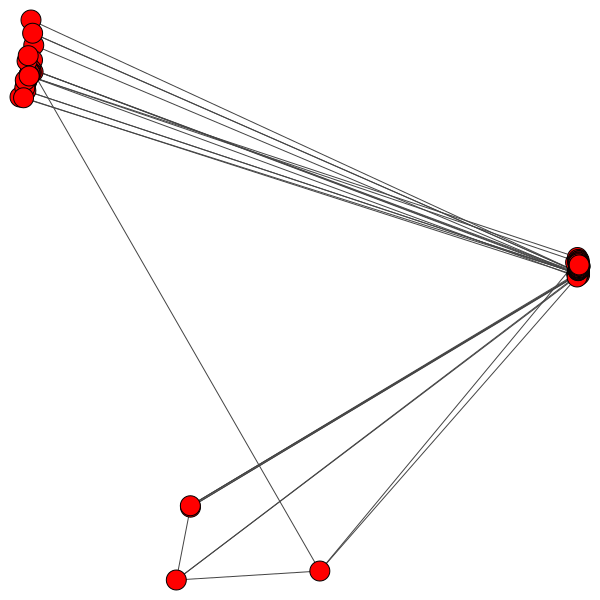

In [4]:
watts = Graph.Watts_Strogatz(1,100,2,0.05)
plot(watts, layout = watts.layout_lgl())

In [5]:
watts.average_path_length() 

5.167676767676768

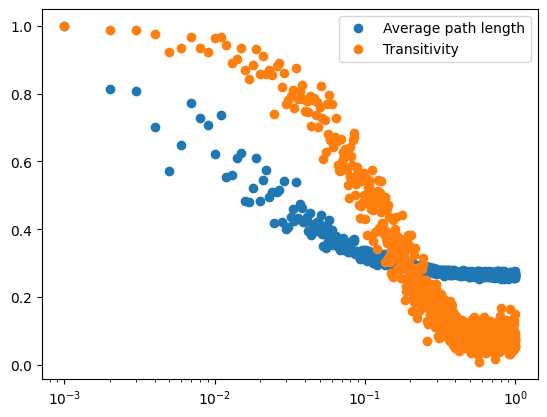

In [43]:
ps = 1000
ps_vector = [i/ps for i in range(ps)]
watts_avg_l = [0]*ps
watts_trans = [0]*ps    
for p in range(ps):
    watts = Graph.Watts_Strogatz(1,100,2,p/ps)
    watts_trans[p] = watts.transitivity_undirected()
    if p != 0:
        watts_avg_l[p] = watts.average_path_length()/watts_avg_l[0]
        watts_trans[p] = watts.transitivity_undirected()/watts_trans[0]
    else:
        watts_avg_l[p] = watts.average_path_length()
        watts_trans[p] = watts.transitivity_undirected()

watts_avg_l[0] = 1
watts_trans[0] = 1

plt.plot(ps_vector, watts_avg_l,'o')
plt.plot(ps_vector, watts_trans,'o')
plt.xscale('log')
plt.legend(['Average path length','Transitivity'])
plt.show()

### 5.2 Plot the average shortest-path length as a function of the network size of the ER model.

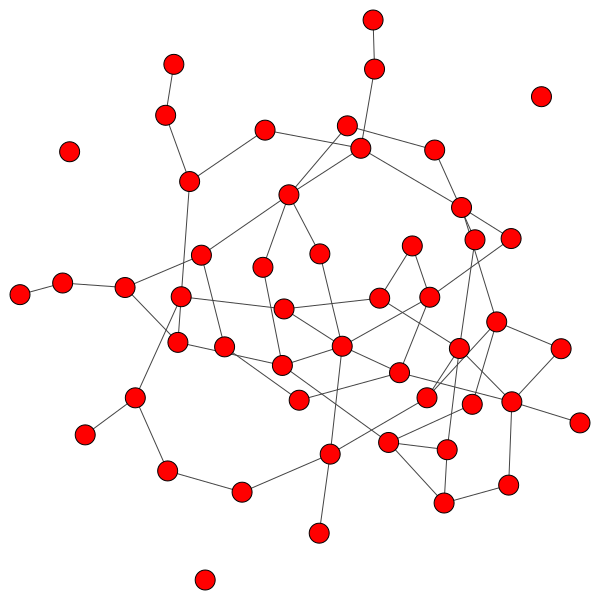

In [44]:
erdos = Graph.Erdos_Renyi(50,0.05)
plot(erdos)

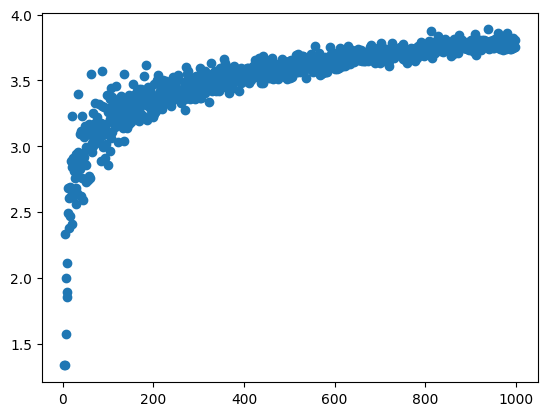

In [61]:
# Triga molt xd, 45 segons per ns = 1000
ns = 1000
ns_vector = [i for i in range(ns)]
ER_avg_l = [0]*ns

for n in range(ns):
    p = (1-0.001)*math.log(n+1)/(n+1)
    erdos = Graph.Erdos_Renyi(n+1,p)
    ER_avg_l[n] = erdos.average_path_length()

plt.plot(ns_vector, ER_avg_l,'o')

### 5.3 Plot a histogram of the degree distribution of a BA network. What distribution does this follow? Can you describe it?

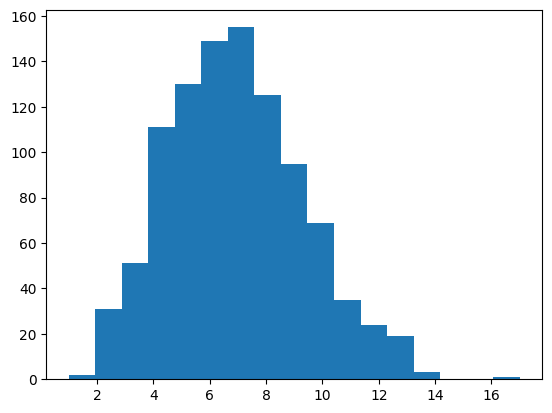

In [62]:
import numpy as np

h, b = np.histogram(erdos.degree(), bins=np.max(erdos.degree()), density=True)
r = plt.hist(erdos.degree(), bins=np.max(erdos.degree()))